In [48]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression #LogisticRegression.score is accuracy 
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle

In [2]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression #LogisticRegression.score is accuracy 

In [3]:
with open('cancer_coded.pkl', 'rb') as file:
    cancer_coded= pickle.load(file)

In [4]:
cancer_coded

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,17.092617,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,37.0,37.0,3.00,0.0,0.0,0.0,0,1,1,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,15.00,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0
854,32,2.0,19.000000,1.0,0.0,0.0,8.00,0.0,0.0,0.0,0,0,0,0,0,0,0
855,25,2.0,17.000000,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0,0,0,0,0,1,0
856,33,2.0,24.000000,2.0,0.0,0.0,0.08,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
cancer_coded['Dx:Cancer'].value_counts()

Dx:Cancer
0    733
1     18
Name: count, dtype: int64

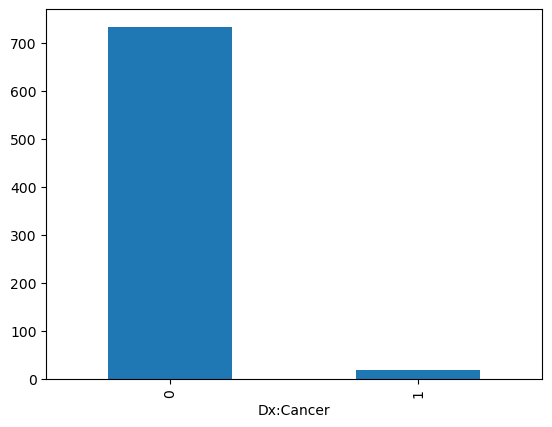

In [6]:
cerv_cancer = cancer_coded["Dx:Cancer"].value_counts()
cerv_cancer.plot(kind="bar")
plt.show()

In [7]:
features = cancer_coded.drop(columns = ["Dx:Cancer"])
target = cancer_coded["Dx:Cancer"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)

X_train_scale = pd.DataFrame(X_train_scale, index = X_train.index, columns=X_train.columns)
X_train_scale.head()

X_test_scale = scaler.transform(X_test)

X_test_scale = pd.DataFrame(X_test_scale, index = X_test.index, columns=X_test.columns)
X_test_scale.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs:HPV,STDs: Number of diagnosis,Dx:HPV,Dx,Hinselmann,Citology,Biopsy
646,0.028571,0.000000,0.227273,0.090909,0.00000,0.000000,0.0125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
643,0.014286,0.111111,0.181818,0.090909,0.03125,0.011111,0.0040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276,0.100000,0.111111,0.318182,0.272727,0.00000,0.000000,0.1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,0.185714,0.185185,0.409091,0.272727,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
615,0.300000,0.185185,0.090909,0.545455,0.00000,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_test_scale

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs:HPV,STDs: Number of diagnosis,Dx:HPV,Dx,Hinselmann,Citology,Biopsy
646,0.028571,0.000000,0.227273,0.090909,0.00000,0.000000,0.0125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
643,0.014286,0.111111,0.181818,0.090909,0.03125,0.011111,0.0040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276,0.100000,0.111111,0.318182,0.272727,0.00000,0.000000,0.1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,0.185714,0.185185,0.409091,0.272727,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
615,0.300000,0.185185,0.090909,0.545455,0.00000,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,-0.014286,0.000000,0.136364,0.000000,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.300000,0.000000,0.500000,0.090909,0.00000,0.000000,0.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.928571,0.037037,0.272727,0.454545,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,0.014286,0.074074,0.227273,0.181818,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scale, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test_scale, y_test) #this will tell you accuracy instead of the separate accuracy score

0.9787234042553191

In [12]:
pred = log_reg.predict(X_test_scale)
print(classification_report(y_pred = pred, y_true = y_test))
#since one of our target column samples is so low, it can skew results

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       185
           1       0.00      0.00      0.00         3

    accuracy                           0.98       188
   macro avg       0.49      0.50      0.49       188
weighted avg       0.97      0.98      0.97       188



In [13]:
from sklearn.metrics import confusion_matrix
log_confusion_matrix= confusion_matrix(y_test, pred)
log_confusion_matrix

array([[184,   1],
       [  3,   0]], dtype=int64)

## Oversampling

We have decided to do oversampling since we don't want to lose data and in the target the 1 is wayyy less than the 0s.

In [14]:
train = pd.DataFrame(X_train_scale, columns = X_train_scale.columns)

train["Dx:Cancer"] = y_train.values

In [15]:
no_cancer = train[train["Dx:Cancer"] == 0]
cancer = train[train["Dx:Cancer"] == 1]

In [16]:
print(no_cancer.shape)
print(cancer.shape)

(548, 17)
(15, 17)


In [17]:
cancer_oversampled = resample(cancer, 
                                    replace=True, 
                                    n_samples = len(no_cancer),
                                    random_state=0)

train_over = pd.concat([cancer_oversampled, no_cancer])
train_over

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs:HPV,STDs: Number of diagnosis,Dx:HPV,Dx,Hinselmann,Citology,Biopsy,Dx:Cancer
578,0.071429,0.000000,0.363636,0.090909,0.0,0.0,0.050,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1
610,0.100000,0.037037,0.363636,0.272727,0.0,0.0,0.000,1.0,0.176471,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1
775,0.185714,0.037037,0.181818,0.272727,0.0,0.0,0.050,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
738,0.185714,0.185185,0.318182,0.181818,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
8,0.442857,0.000000,0.454545,0.454545,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.228571,0.037037,0.181818,0.545455,0.0,0.0,0.250,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
719,0.371429,0.037037,0.318182,0.272727,0.0,0.0,0.950,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
471,0.057143,0.037037,0.272727,0.090909,0.0,0.0,0.050,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
296,0.142857,0.074074,0.318182,0.090909,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
train_over["Dx:Cancer"].value_counts()

Dx:Cancer
1    548
0    548
Name: count, dtype: int64

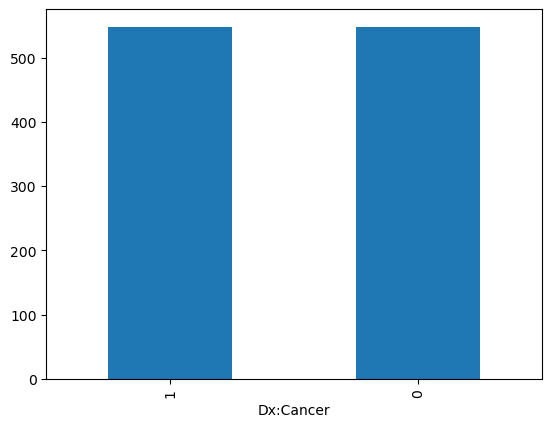

In [19]:
cancer_plt = train_over["Dx:Cancer"].value_counts()
cancer_plt.plot(kind="bar")
plt.show()

In [20]:
X_train_over = train_over.drop(columns = ["Dx:Cancer"])
y_train_over = train_over["Dx:Cancer"]

In [95]:
log_reg = LogisticRegression(solver ='saga',penalty = None)
log_reg.fit(X_train_over, y_train_over)

C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='saga')

In [96]:
pred = log_reg.predict(X_test_scale)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       185
           1       0.50      0.33      0.40         3

    accuracy                           0.98       188
   macro avg       0.74      0.66      0.70       188
weighted avg       0.98      0.98      0.98       188



In [97]:
log_reg.score(X_test_scale, y_test)

0.9840425531914894

In [98]:
log_confusion_matrix= confusion_matrix(y_test, pred)
log_confusion_matrix

array([[184,   1],
       [  2,   1]], dtype=int64)

## Random Search

In [90]:
#dictionary of parameters for logistic

grid = {"solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
       "penalty" : ['l1', 'l2', 'elasticnet', None]}

In [91]:
los_reg = LogisticRegression()

model = RandomizedSearchCV(estimator = los_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [92]:
model.fit(X_train_over,y_train_over)

C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\linea

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

In [93]:
model.best_params_

{'solver': 'saga', 'penalty': None}

In [46]:
best_model = model.best_estimator_

In [51]:
pred = best_model.predict(X_test_scale)

#these are for regression and we are doing classification
#print("MAE", mean_absolute_error(pred, y_test))
#print("RMSE", mean_squared_error(pred, y_test, squared=False))
#print("R2 score", best_model.score(X_test_scale, y_test))


#classification
print(f"Precision:",{precision_score(y_test, pred,zero_division=0)})
print(f"Accuracy:",{accuracy_score(y_test, pred)})
print(f"Recall:",{recall_score(y_test, pred)})
print(f"F1:",{f1_score(y_test, pred)}) 

Precision: {0.6666666666666666}
Accuracy: {0.9893617021276596}
Recall: {0.6666666666666666}
F1: {0.6666666666666666}


## SMOTE

We realized that oversampling worked better so we focused on that

In [29]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

X_train_sm,y_train_sm = sm.fit_resample(X_train_scale,y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [32]:
pred = log_reg.predict(X_test_scale)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       185
           1       0.00      0.00      0.00         3

    accuracy                           0.98       188
   macro avg       0.49      0.50      0.49       188
weighted avg       0.97      0.98      0.97       188



In [33]:
log_reg.score(X_test_scale, y_test)

0.9787234042553191

In [34]:
log_reg_confusion_matrix = confusion_matrix(y_test,pred)
log_reg_confusion_matrix

array([[184,   1],
       [  3,   0]], dtype=int64)